<a href="https://colab.research.google.com/github/rflsg/Proyecto2/blob/main/BasedeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np
import seaborn as sns
from PIL import Image
from matplotlib import rc

In [4]:
link='https://github.com/rflsg/Proyecto2/blob/main/EXECUTION_USA.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, Gary Gilmore to Ronald Smith
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1442 non-null   object
 1   Age               1442 non-null   int64 
 2   Sex               1442 non-null   object
 3   Race              1442 non-null   object
 4   Crime             1442 non-null   object
 5   Victim Count      1442 non-null   int64 
 6   Victim Sex        1437 non-null   object
 7   Victim Race       1436 non-null   object
 8   County            1440 non-null   object
 9   State             1442 non-null   object
 10  Region            1442 non-null   object
 11  Method            1442 non-null   object
 12  Juvenile          1442 non-null   object
 13  Volunteer         1442 non-null   object
 14  Federal           1442 non-null   object
 15  Foreign National  1442 non-null   object
dtypes: int64(2), object(14)
memory usage: 191.5+ K

In [6]:
def infoOut(data,details=False): #https://stackoverflow.com/a/71379945
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

inf = infoOut(df)
inf.to_latex()

'\\begin{tabular}{llrl}\n\\toprule\n & Column & Non-Null Count & Dtype \\\\\n\\midrule\n0 & Date & 1442 & object \\\\\n1 & Age & 1442 & int64 \\\\\n2 & Sex & 1442 & object \\\\\n3 & Race & 1442 & object \\\\\n4 & Crime & 1442 & object \\\\\n5 & Victim Count & 1442 & int64 \\\\\n6 & Victim Sex & 1437 & object \\\\\n7 & Victim Race & 1436 & object \\\\\n8 & County & 1440 & object \\\\\n9 & State & 1442 & object \\\\\n10 & Region & 1442 & object \\\\\n11 & Method & 1442 & object \\\\\n12 & Juvenile & 1442 & object \\\\\n13 & Volunteer & 1442 & object \\\\\n14 & Federal & 1442 & object \\\\\n15 & Foreign National & 1442 & object \\\\\n\\bottomrule\n\\end{tabular}\n'

In [7]:
df.head()

,Date,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
Name,,,,,,,,,,,,,,,,
Gary Gilmore,01/17/1977,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
John Spenkelink,05/25/1979,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
Jesse Bishop,10/22/1979,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
Steven Judy,03/09/1981,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
Frank Coppola,08/10/1982,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No


In [8]:
df.tail()

,Date,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
Name,,,,,,,,,,,,,,,,
Barney Fuller,10/05/2016,53,Male,White,Murder,2,"1 Male, 1 Female",White,Houston County,TX,South,Lethal Injection,No,Yes,No,No
Gregory Lawler,10/19/2016,63,Male,White,Murder,1,Male,White,Fulton,GA,South,Lethal Injection,No,No,No,No
Steven Spears,11/16/2016,54,Male,White,Murder,1,Female,White,Lumpkin,GA,South,Lethal Injection,No,Yes,No,No
William Sallie,12/06/2016,50,Male,White,Murder,1,Male,White,Bacon,GA,South,Lethal Injection,No,No,No,No
Ronald Smith,12/08/2016,45,Male,White,Murder,1,Male,White,Madison,AL,South,Lethal Injection,No,No,No,No


In [9]:
df.isnull().sum().to_latex()

'\\begin{tabular}{lr}\n\\toprule\n & 0 \\\\\n\\midrule\nDate & 0 \\\\\nAge & 0 \\\\\nSex & 0 \\\\\nRace & 0 \\\\\nCrime & 0 \\\\\nVictim Count & 0 \\\\\nVictim Sex & 5 \\\\\nVictim Race & 6 \\\\\nCounty & 2 \\\\\nState & 0 \\\\\nRegion & 0 \\\\\nMethod & 0 \\\\\nJuvenile & 0 \\\\\nVolunteer & 0 \\\\\nFederal & 0 \\\\\nForeign National & 0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [10]:
df['Sex'].isin(['Male']).sum()

1426

In [11]:
conteoSexo=df.groupby('Sex').size().reset_index(name='Conteo')
orConteoSexo=conteoSexo.sort_values(by=['Conteo'], ascending=0)
orConteoSexo

,Sex,Conteo
1,Male,1426
0,Female,16


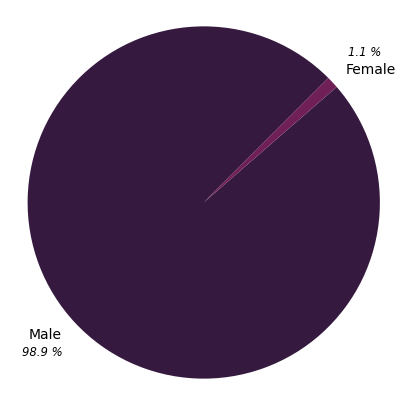

In [12]:
plt.figure(figsize=(5, 5))

patches, texts, autotexts = plt.pie(
    orConteoSexo['Conteo'],
    labels=orConteoSexo['Sex'],
    autopct="%1.1f %%",
    colors=sns.color_palette("rocket"), #Paleta de colores de seaborn
    startangle=45,
    pctdistance=1.25,
    wedgeprops = { 'linewidth': 0 }
    )

for autotext in autotexts:
  autotext.set_fontstyle('italic')
  autotext.set_size('small')

plt.axis("equal")
plt.savefig('EjecucionesS.png', dpi=300, format='png')
img = Image.open('EjecucionesS.png').convert('L')
img.save('EjecucionesS_greyscale.png')
plt.show()

In [13]:
conteoRaza=df.groupby('Race').size().reset_index(name=('Conteo'))
orConteoRaza=conteoRaza.sort_values(by=['Conteo'], ascending=False)
orConteoRaza

,Race,Conteo
5,White,803
1,Black,495
2,Latino,120
3,Native American,16
0,Asian,6
4,Other,2


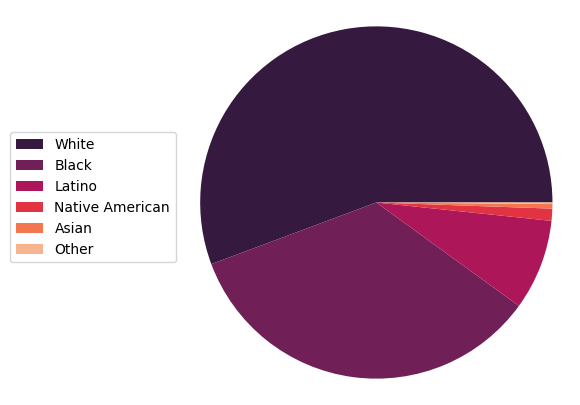

In [14]:
plt.figure(figsize=(5, 5))
texts = plt.pie(
    orConteoRaza['Conteo'],
    colors=sns.color_palette("rocket"),
    wedgeprops = { 'linewidth': 0 }
    )
plt.legend(orConteoRaza['Race'],
           bbox_to_anchor=(0,.7)
           )

plt.axis("equal")
plt.savefig('EjecucionesRaza.png', dpi=300, format='png', bbox_inches='tight')
img = Image.open('EjecucionesRaza.png').convert('L')
img.save('EjecucionesRaza_greyscale.png')
plt.show()

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
conteoYear=df.groupby(df['Date'].dt.year).size().reset_index(name='Conteo')
conteoYear

,Date,Conteo
0,1977,1
1,1979,2
2,1981,1
3,1982,2
4,1983,5
5,1984,21
6,1985,18
7,1986,18
8,1987,25
9,1988,11


In [17]:
NW=df[df['Race']=='White']
conteoNW=NW.groupby(NW['Date'].dt.year).size().reset_index(name='Conteo')
conteoNW

,Date,Conteo
0,1977,1
1,1979,2
2,1981,1
3,1982,1
4,1983,4
5,1984,13
6,1985,9
7,1986,9
8,1987,11
9,1988,6


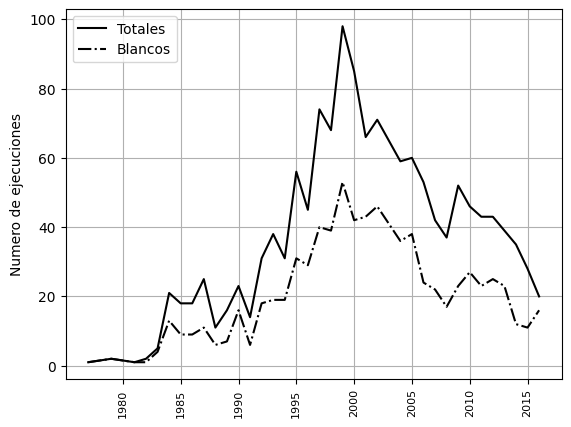

In [18]:
Year=conteoYear['Date']

plt.plot(Year,conteoYear['Conteo'],label='Totales',c='k')
plt.plot(Year,conteoNW['Conteo'],label='Blancos',c='k', ls='-.')
plt.ylabel('Numero de ejecuciones')
plt.legend(loc='upper left')
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.savefig('EjecucionesEU.png', dpi=300, format='png')
plt.show()

In [19]:
df.groupby('Region').size().reset_index(name='Conteo')

,Region,Conteo
0,Midwest,178
1,Northeast,4
2,South,1175
3,West,85


In [20]:
South=df[df['Region']=='South']
Midwest=df[df['Region']=='Midwest']
Northeast=df[df['Region']=='Northeast']
West=df[df['Region']=='West']

In [21]:
conteoRazaSur=South.groupby('Race').size().reset_index(name='Conteo')
conteoRazaSur

,Race,Conteo
0,Asian,4
1,Black,426
2,Latino,114
3,Native American,11
4,Other,2
5,White,618


In [22]:
conteoRazaOeste=West.groupby('Race').size().reset_index(name='Conteo')
conteoRazaOeste

,Race,Conteo
0,Asian,2
1,Black,6
2,Latino,6
3,Native American,4
4,White,67


In [23]:
conteoRazaMedOeste=Midwest.groupby('Race').size().reset_index(name='Conteo')
conteoRazaMedOeste

,Race,Conteo
0,Black,63
1,Native American,1
2,White,114


In [24]:
conteoRazaNoreste=Northeast.groupby('Race').size().reset_index(name='Conteo')
conteoRazaNoreste

,Race,Conteo
0,White,4


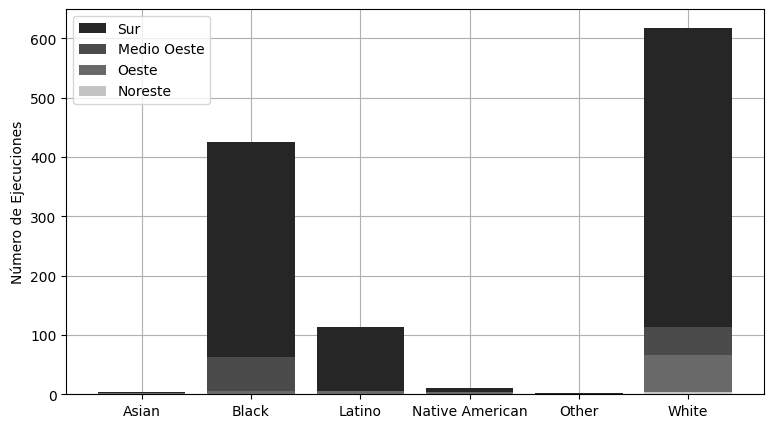

In [25]:
fig=plt.figure(figsize=(9,5))
ax=fig.add_subplot()

ax.bar(conteoRazaSur['Race'],conteoRazaSur['Conteo'], label='Sur',zorder=3, color='#262626')
ax.bar(conteoRazaMedOeste['Race'],conteoRazaMedOeste['Conteo'], label='Medio Oeste',zorder=3, color='#4b4b4b')
ax.bar(conteoRazaOeste['Race'],conteoRazaOeste['Conteo'], label='Oeste',zorder=3, color='#696969')
ax.bar(conteoRazaNoreste['Race'],conteoRazaNoreste['Conteo'], label='Noreste',zorder=3, color='#c4c4c4')

plt.grid()
plt.legend()
plt.ylabel('Número de Ejecuciones')
plt.savefig('EjecucionesPR.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

In [26]:
conteoMetodo=df.groupby(['Method']).size().reset_index(name='Conteo')
orConteoMetodo=conteoMetodo.sort_values(by=['Conteo'], ascending=False)
orConteoMetodo

,Method,Conteo
4,Lethal Injection,1267
0,Electrocution,158
2,Gas Chamber,11
1,Firing Squad,3
3,Hanging,3


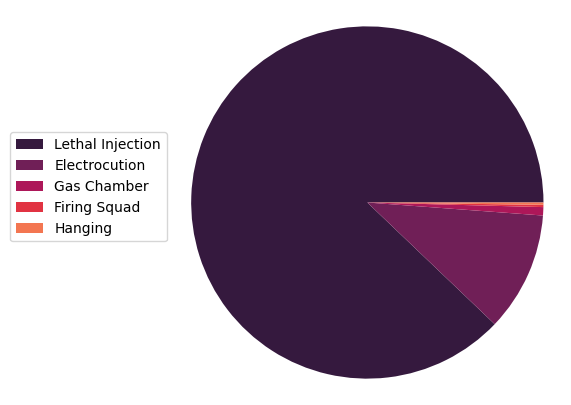

In [27]:
plt.figure(figsize=(5, 5))
texts = plt.pie(
    orConteoMetodo['Conteo'],
    colors=sns.color_palette("rocket"),
    wedgeprops = { 'linewidth': 0 }
    )
plt.legend(orConteoMetodo['Method'],
           bbox_to_anchor=(0,.7)
           )

plt.axis("equal")
plt.savefig('EjecucionesPM.png', dpi=300, format='png', bbox_inches='tight')
img = Image.open('EjecucionesPM.png').convert('L')
img.save('EjecucionesPM_greyscale.png')
plt.show()

In [28]:
df.describe().to_latex()

'\\begin{tabular}{llrr}\n\\toprule\n & Date & Age & Victim Count \\\\\n\\midrule\ncount & 1442 & 1442.000000 & 1442.000000 \\\\\nmean & 2001-09-30 03:31:42.357836416 & 41.479889 & 1.537448 \\\\\nmin & 1977-01-17 00:00:00 & 22.000000 & 1.000000 \\\\\n25% & 1997-01-08 12:00:00 & 34.000000 & 1.000000 \\\\\n50% & 2001-06-26 12:00:00 & 40.000000 & 1.000000 \\\\\n75% & 2007-06-20 18:00:00 & 47.000000 & 1.750000 \\\\\nmax & 2016-12-08 00:00:00 & 77.000000 & 168.000000 \\\\\nstd & NaN & 9.471676 & 4.495852 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [29]:
WhiteDF=df[df['Race']=='White']
BlackDF=df[df['Race']=='Black']
NADF=df[df['Race']=='Native American']
LatinoDF=df[df['Race']=='Latino']

In [43]:
WhiteDF.describe()

,Date,Age,Victim Count
count,803,803.000000,803.000000
mean,2001-07-27 06:29:08.443337344,43.088418,1.679950
min,1977-01-17 00:00:00,23.000000,1.000000
25%,1996-12-14 00:00:00,36.000000,1.000000
50%,2001-08-08 00:00:00,42.000000,1.000000
75%,2006-10-25 12:00:00,49.000000,2.000000
max,2016-12-08 00:00:00,77.000000,168.000000
std,NaN,9.820758,5.972166


In [42]:
BlackDF.describe()

,Date,Age,Victim Count
count,495,495.000000,495.000000
mean,2001-07-09 21:05:27.272727296,39.575758,1.351515
min,1982-12-07 00:00:00,24.000000,1.000000
25%,1996-02-21 12:00:00,33.000000,1.000000
50%,2001-01-11 00:00:00,38.000000,1.000000
75%,2007-08-22 12:00:00,45.000000,1.000000
max,2016-04-12 00:00:00,72.000000,8.000000
std,NaN,8.568007,0.854657


In [32]:
LatinoDF.describe().to_latex()

'\\begin{tabular}{llrr}\n\\toprule\n & Date & Age & Victim Count \\\\\n\\midrule\ncount & 120 & 120.000000 & 120.000000 \\\\\nmean & 2004-02-29 16:12:00 & 38.475000 & 1.366667 \\\\\nmin & 1985-05-15 00:00:00 & 24.000000 & 1.000000 \\\\\n25% & 1998-09-16 00:00:00 & 32.000000 & 1.000000 \\\\\n50% & 2005-02-26 00:00:00 & 38.000000 & 1.000000 \\\\\n75% & 2010-06-15 00:00:00 & 44.000000 & 1.000000 \\\\\nmax & 2016-04-06 00:00:00 & 61.000000 & 9.000000 \\\\\nstd & NaN & 8.068991 & 0.969565 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [33]:
NADF.describe().to_latex()

'\\begin{tabular}{llrr}\n\\toprule\n & Date & Age & Victim Count \\\\\n\\midrule\ncount & 16 & 16.000000 & 16.000000 \\\\\nmean & 2000-05-17 01:30:00 & 43.062500 & 1.312500 \\\\\nmin & 1993-03-03 00:00:00 & 22.000000 & 1.000000 \\\\\n25% & 1998-01-28 18:00:00 & 36.500000 & 1.000000 \\\\\n50% & 2000-01-05 12:00:00 & 40.000000 & 1.000000 \\\\\n75% & 2001-06-05 00:00:00 & 50.250000 & 1.000000 \\\\\nmax & 2010-10-26 00:00:00 & 76.000000 & 3.000000 \\\\\nstd & NaN & 12.824293 & 0.704154 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [34]:
conteoEstado=df.groupby(['State']).size().reset_index(name='Conteo')
orConteoEstado= conteoEstado.sort_values(by=['Conteo'], ascending=False)
orConteoEstado

,State,Conteo
30,TX,538
24,OK,112
32,VA,111
8,FL,92
16,MO,87
9,GA,69
0,AL,58
23,OH,53
27,SC,43
19,NC,43


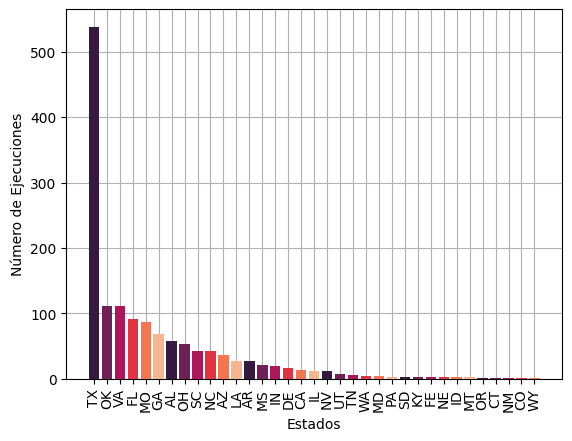

In [35]:
fig=plt.figure()
ax=fig.add_subplot()

ax.bar(orConteoEstado['State'],orConteoEstado['Conteo'], color=sns.color_palette("rocket"), zorder=3)

plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Estados')
plt.ylabel('Número de Ejecuciones')
plt.savefig('EjecucionesPE.png', dpi=300, format='png', bbox_inches='tight')
img = Image.open('EjecucionesPE.png').convert('L')
img.save('EjecucionesPE_greyscale.png')
plt.xlabel('Estados')
plt.ylabel('Número de Ejecuciones')
plt.show()

In [36]:
VW=df[df['Victim Race']=='White']
conteoVW=VW.groupby(VW['Date'].dt.year).size().reset_index(name='Conteo')
conteoVW

,Date,Conteo
0,1977,1
1,1979,2
2,1981,1
3,1982,2
4,1983,4
5,1984,19
6,1985,14
7,1986,16
8,1987,21
9,1988,8


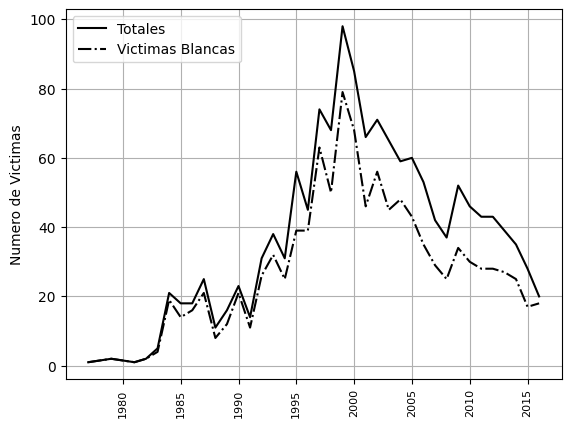

In [37]:
Year=conteoYear['Date']

plt.plot(Year,conteoYear['Conteo'],label='Totales',c='k')
plt.plot(Year,conteoVW['Conteo'],label='Victimas Blancas',c='k', ls='-.')
plt.ylabel('Numero de Victimas')
plt.legend(loc='upper left')
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.savefig('VictimasEU.png', dpi=300, format='png')
plt.show()

In [38]:
conteoSexoV=df.groupby('Victim Sex').size().reset_index(name='Conteo')
orConteoSexoV=conteoSexoV.sort_values(by=['Conteo'], ascending=0)
orConteoSexoV

,Victim Sex,Conteo
16,Male,631
15,Female,593
0,"1 Male, 1 Female",119
5,"2 Male, 1 Female",27
1,"1 Male, 2 Female",25
8,"3 Male, 1 Female",12
6,"2 Male, 2 Female",9
3,"1 Male, 4 Female",5
2,"1 Male, 3 Female",5
7,"2 Male, 3 Female",3


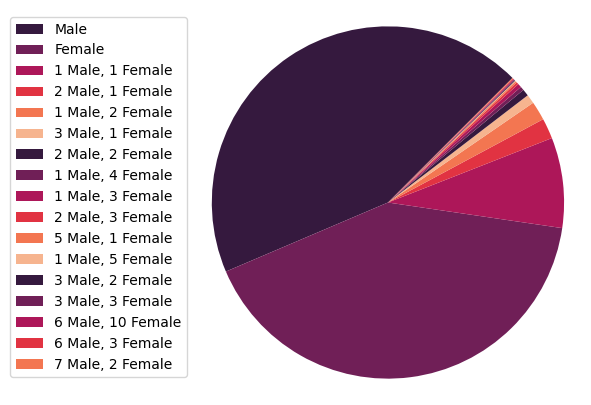

In [39]:
plt.figure(figsize=(5, 5))

patches= plt.pie(
    orConteoSexoV['Conteo'],
    colors=sns.color_palette("rocket"),
    startangle=45,
    pctdistance=1.25,
    wedgeprops = { 'linewidth': 0 }
    )

\
plt.legend(orConteoSexoV['Victim Sex'],
           bbox_to_anchor=(0,1)
           )

plt.axis("equal")
plt.savefig('EjecucionesSV.png', dpi=300, format='png', bbox_inches='tight')
img = Image.open('EjecucionesSV.png').convert('L')
img.save('EjecucionesSV_greyscale.png')
plt.show()

In [40]:
conteoCrimen=df.groupby('Crime').size().reset_index(name='Conteo')
orConteoCrimen=conteoCrimen.sort_values(by=['Conteo'], ascending=0)
orConteoCrimen

,Crime,Conteo
0,Murder,1442


In [41]:
df.sort_values(by=['Victim Count'], ascending=False)

,Date,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
Name,,,,,,,,,,,,,,,,
Timothy McVeigh*,2001-06-11,33,Male,White,Murder,168,NaN,NaN,Oklahoma,FE,South,Lethal Injection,No,Yes,Yes,No
Ronald Simmons,1990-06-25,49,Male,White,Murder,16,"6 Male, 10 Female",White,Pope,AR,South,Lethal Injection,No,Yes,No,No
John Gacy,1994-05-10,52,Male,White,Murder,12,Male,White,Cook,IL,Midwest,Lethal Injection,No,No,No,No
Manuel Pardo,2012-12-11,56,Male,Latino,Murder,9,"6 Male, 3 Female","1 White, 8 Latino",Miami-Dade,FL,South,Lethal Injection,No,No,No,No
John Ferguson,2013-08-05,65,Male,Black,Murder,8,"7 Male, 2 Female","2 White, 6 Black",Miami-Dade,FL,South,Lethal Injection,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clydell Coleman,1999-05-05,62,Male,Black,Murder,1,Female,Black,McLennan,TX,South,Lethal Injection,No,No,No,No
Manuel Babbitt,1999-05-04,50,Male,Black,Murder,1,Female,White,Sacramento,CA,West,Lethal Injection,No,No,No,No
Jose De La Cruz,1999-05-04,31,Male,Latino,Murder,1,Male,Latino,Nueces,TX,South,Lethal Injection,No,No,No,No


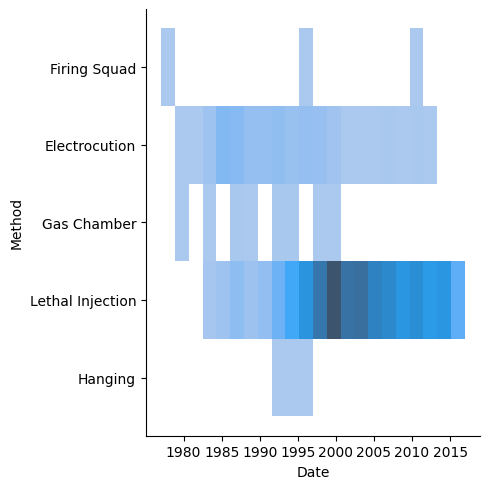

In [47]:
sns.displot(df, x="Date", y='Method')